<a href="https://colab.research.google.com/github/Alifiamutiaaa/UASMachineLearning/blob/main/UASML_LinearRegression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression
---

1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loss
- forward pass: compute prediction and loss
- backward pass: gradient
- update weight

In [10]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [11]:
# Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [12]:
# Design model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [13]:
# Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
  # Forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  # Backward pass and update
  loss.backward()
  optimizer.step()

  # zero grad before new step
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4065.6895
epoch: 20, loss = 2863.8625
epoch: 30, loss = 2044.9761
epoch: 40, loss = 1486.8890
epoch: 50, loss = 1106.4590
epoch: 60, loss = 847.0758
epoch: 70, loss = 670.1875
epoch: 80, loss = 549.5323
epoch: 90, loss = 467.2173
epoch: 100, loss = 411.0482


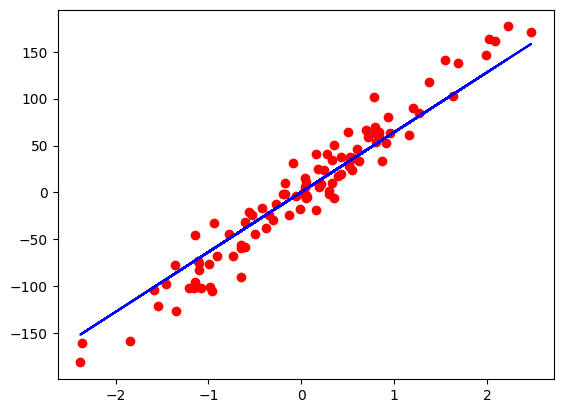

In [15]:
# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()